#2. Polynomial Regression in One Dimension

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
#Given Function with noise

def f(x):
    return np.cos(2*np.pi*x) + x/(2*np.pi) + np.random.normal(0,0.004)

## 1. Creating the Dataset

In [35]:

def gen_data(n):

    data_x = []

    for i in range(n):
        data_x.append(2*np.pi*np.random.random())
    X = np.array(data_x)
    X = X.reshape(n,1)
    
    data_y = []

    for i in range(n):
        data_y.append(f(data_x[i])) 
    data_y = np.array(data_y)
    data_y = data_y.reshape(n,1)

    return X, data_y

n = 20
data_x, data_y = gen_data(n)
data_x, data_y

(array([[2.22242303],
        [5.65355566],
        [6.21641358],
        [1.02141754],
        [1.93382011],
        [5.8840752 ],
        [1.15054949],
        [1.07911792],
        [1.0135853 ],
        [0.47966454],
        [3.93108535],
        [2.08119581],
        [0.34465025],
        [3.59558762],
        [1.38442294],
        [4.20534084],
        [2.07082203],
        [4.90436864],
        [1.46429819],
        [2.14399105]]), array([[ 0.52603324],
        [ 0.33387834],
        [ 1.20340148],
        [ 1.1553523 ],
        [ 1.22299832],
        [ 1.67764856],
        [ 0.75983463],
        [ 1.04248499],
        [ 1.16117743],
        [-0.91249842],
        [ 1.5290057 ],
        [ 1.20087977],
        [-0.50376071],
        [-0.24902165],
        [-0.52499522],
        [ 0.95018345],
        [ 1.23041216],
        [ 1.60445686],
        [-0.73688808],
        [ 0.9532124 ]]))

## 2. Fitting the Data

In [36]:
def poly_X(data_x, m):

    X = np.ones(n)
    X = X.reshape(n,1)
    for i in range(m):
        cl = np.power(data_x, i+1)
        cl = cl.reshape(n,1)
        X = np.c_[X, cl]
    return X

In [37]:
def w_opt(X,y):

    X_trans = np.transpose(X)

    temp = np.linalg.inv(np.matmul(X_trans, X))

    w_optimal = np.matmul(np.matmul(temp,X_trans), y)
   
    return w_optimal

In [38]:
def poly_reg(w_optimal, x, m):

    out = w_optimal[0][0]
    for i in range(m):
        out += (w_optimal[i+1][0])*(x**(i+1))
    return out

In [39]:
def mse_error(X, y, w_optimal, n, m):
    error = 0

    for i in range(n):
        error += (poly_reg(w_optimal, X[i][0], m) - y[i][0])**2
    
    return error/n

In [40]:
res = pd.DataFrame(columns=['M = 1', 'M = 2', 'M = 3', 'M = 5', 'M = 7', 'M = 10'])


### 1. M = 1

In [41]:
exp_1 = []

m = 1
X_input = poly_X(data_x,m)
w_optimal = w_opt(X_input, data_y)
error = mse_error(X_input, data_y, w_optimal, n, m)
X_input, w_optimal, error

exp_1.append(error)


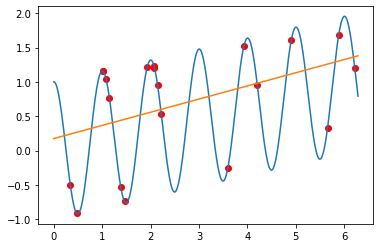

In [42]:
x = np.linspace(0, 2*np.pi, 1000)
plt.plot(data_x,data_y,'o', color='red')
plt.plot(x, np.cos(2*np.pi*x) + x/(2*np.pi) + np.random.normal(0,0.004))
plt.plot(x, poly_reg(w_optimal, x, m))

### 2. M = 2

In [43]:
m = 2
X_input = poly_X(data_x,m)
w_optimal = w_opt(X_input, data_y)
error = mse_error(X_input, data_y, w_optimal, n, m)
X_input, w_optimal, error
exp_1.append(error)

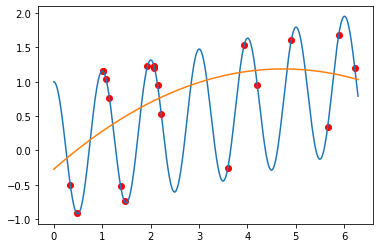

In [44]:
x = np.linspace(0, 2*np.pi, 1000)
plt.plot(data_x,data_y,'o', color='red')
plt.plot(x, np.cos(2*np.pi*x) + x/(2*np.pi) + np.random.normal(0,0.004))
plt.plot(x, poly_reg(w_optimal, x, m))

### 3. M = 3

In [45]:
m = 3
X_input = poly_X(data_x,m)
w_optimal = w_opt(X_input, data_y)
error = mse_error(X_input, data_y, w_optimal, n, m)
X_input, w_optimal, error
exp_1.append(error)

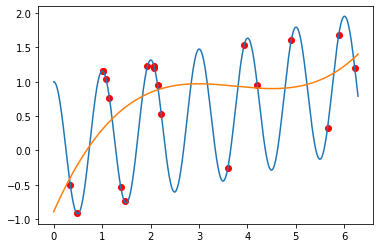

In [46]:
x = np.linspace(0, 2*np.pi, 1000)
plt.plot(data_x,data_y,'o', color='red')
plt.plot(x, np.cos(2*np.pi*x) + x/(2*np.pi) + np.random.normal(0,0.004))
plt.plot(x, poly_reg(w_optimal, x, m))

### 3. M = 5

In [47]:
m = 5
X_input = poly_X(data_x,m)
w_optimal = w_opt(X_input, data_y)
error = mse_error(X_input, data_y, w_optimal, n, m)
X_input, w_optimal, error
exp_1.append(error)

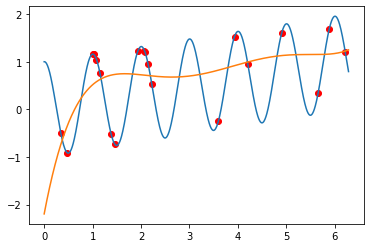

In [48]:
x = np.linspace(0, 2*np.pi, 1000)
plt.plot(data_x,data_y,'o', color='red')
plt.plot(x, np.cos(2*np.pi*x) + x/(2*np.pi) + np.random.normal(0,0.004))
plt.plot(x, poly_reg(w_optimal, x, m))

### 4. M = 7

In [49]:
m = 7
X_input = poly_X(data_x,m)
w_optimal = w_opt(X_input, data_y)
error = mse_error(X_input, data_y, w_optimal, n, m)
X_input, w_optimal, error
exp_1.append(error)

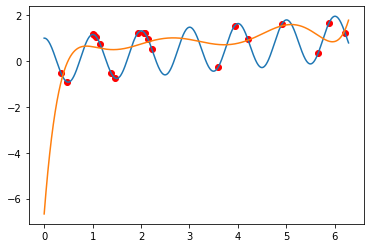

In [50]:
x = np.linspace(0, 2*np.pi, 1000)
plt.plot(data_x,data_y,'o', color='red')
plt.plot(x, np.cos(2*np.pi*x) + x/(2*np.pi) + np.random.normal(0,0.004))
plt.plot(x, poly_reg(w_optimal, x, m))

### 5. M = 10

In [51]:
m = 10
X_input = poly_X(data_x,m)
w_optimal = w_opt(X_input, data_y)
error = mse_error(X_input, data_y, w_optimal, n, m)
X_input, w_optimal, error
exp_1.append(error)

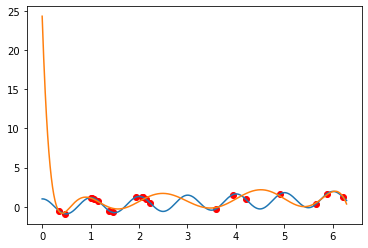

In [52]:
x = np.linspace(0, 2*np.pi, 1000)
plt.plot(data_x,data_y,'o', color='red')
plt.plot(x, np.cos(2*np.pi*x) + x/(2*np.pi) + np.random.normal(0,0.004))
plt.plot(x, poly_reg(w_optimal, x, m))

In [53]:
'''
exp_1 = {
    'M = 1': ,
    'M = 2':,
    'M = 3':, 
    'M = 5': , 
    'M = 7': , 
    'M = 10':
}
'''
exp_1
res.loc[len(res)] = exp_1
res

,M = 1,M = 2,M = 3,M = 5,M = 7,M = 10
0,0.74175,0.806559,0.78685,0.670076,0.646555,0.82684


### 3. Repeat the Experiment

#### Exp 2

In [54]:
def summary(m):
    X_input = poly_X(data_x,m)
    w_optimal = w_opt(X_input, data_y)
    error = mse_error(X_input, data_y, w_optimal, n, m)
    return X_input, w_optimal, error

In [55]:
def plot(m):
    x = np.linspace(0, 2*np.pi, 1000)
    plt.plot(data_x,data_y,'o', color='red')
    plt.plot(x, np.cos(2*np.pi*x) + x/(2*np.pi) + np.random.normal(0,0.004))
    plt.plot(x, poly_reg(w_optimal, x, m))
    return None

In [56]:
exp_2 = []
n = 100
data_x, data_y = gen_data(n)

<function matplotlib.pyplot.show>

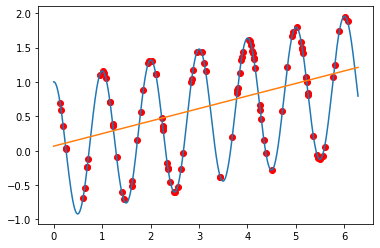

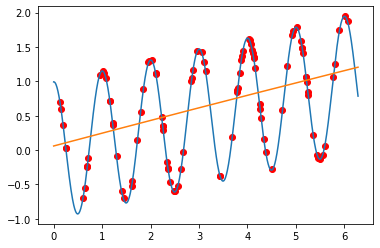

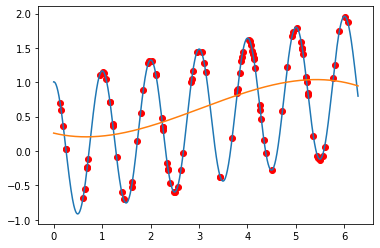

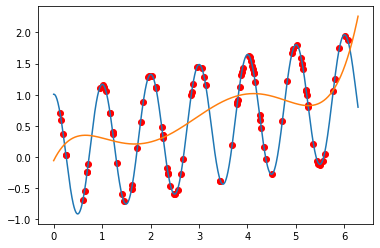

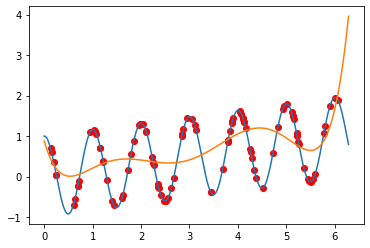

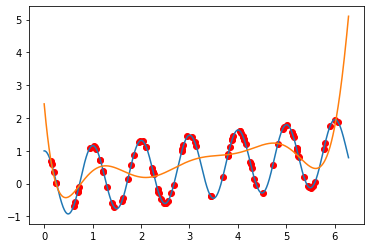

In [57]:
M = [1,2,3,5,7,10]
temp = []
for deg in M:
    X_input, w_optimal, error = summary(deg)
    plt.figure()
    plot(deg)
    temp.append(error)
plt.show


In [58]:
res.loc[len(res)] = temp

#### Exp 3

In [59]:
exp_3 = []
n = 1000
data_x, data_y = gen_data(n)

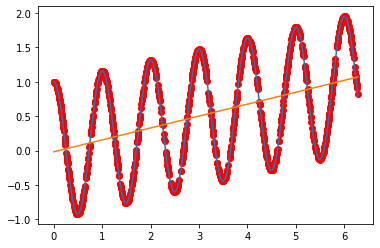

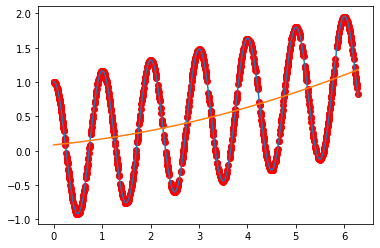

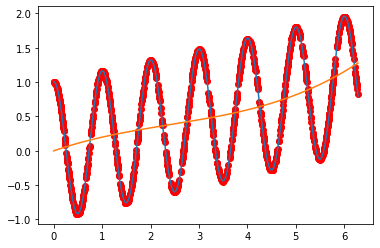

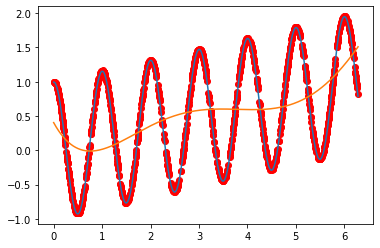

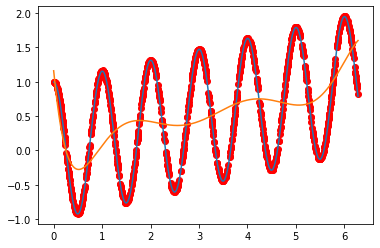

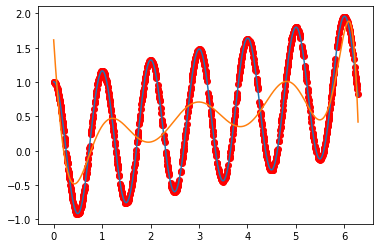

In [60]:
M = [1,2,3,5,7,10]
temp = []
for deg in M:
    X_input, w_optimal, error = summary(deg)
    plt.figure()
    plot(deg)
    temp.append(error)
plt.show()

In [61]:
res.loc[len(res)] = temp

#### Exp 4

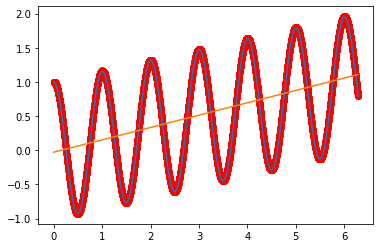

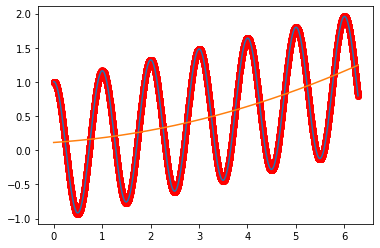

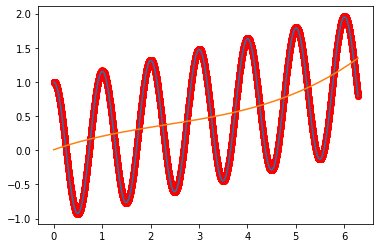

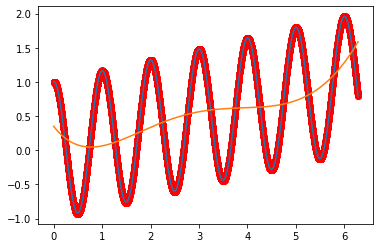

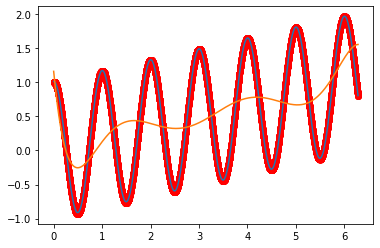

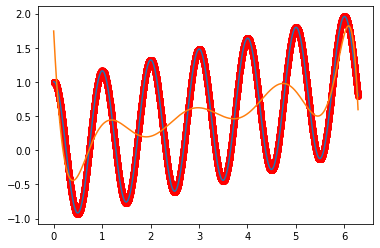

In [62]:
exp_3 = []
n = 10000
data_x, data_y = gen_data(n)

M = [1,2,3,5,7,10]
temp = []
for deg in M:
    X_input, w_optimal, error = summary(deg)
    plt.figure()
    plot(deg)
    temp.append(error)
plt.show()

In [63]:
res.loc[len(res)] = temp

In [64]:
res

,M = 1,M = 2,M = 3,M = 5,M = 7,M = 10
0,0.741750,0.806559,0.786850,0.670076,0.646555,0.826840
1,0.697384,0.698438,0.722872,0.655508,0.730056,0.605532
2,0.719266,0.707205,0.690189,0.840951,0.788565,0.612472
3,0.757106,0.734750,0.718499,0.834137,0.779431,0.634267
